Epoch 1/5, Loss: 0.33541099872243424
Epoch 2/5, Loss: 0.18024423888888122
Epoch 3/5, Loss: 0.10952340274659945
Epoch 4/5, Loss: 0.09518995642375615
Epoch 5/5, Loss: 0.09100226156938789


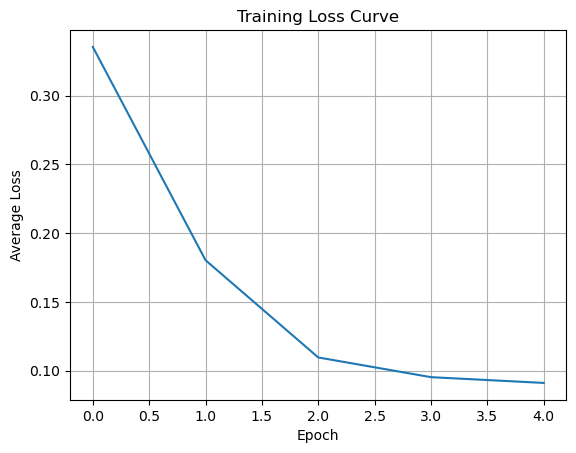

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import pickle as pkl
import matplotlib.pyplot as plt

# Load test params
file_path = r'C:\Users\CooperO\SYDE577\assignment-one-test-parameters.pkl'

with open(file_path, 'rb') as file:
    data = pkl.load(file)

inputs = torch.tensor(data['inputs'], dtype=torch.float32)
targets = torch.tensor(data['targets'], dtype=torch.float32)

# Define model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)  
        self.relu = nn.ReLU()
        
        model.fc1.weight = nn.Parameter(torch.tensor(data['w1'], dtype=torch.float32))
        model.fc1.bias = nn.Parameter(torch.tensor(data['b1'], dtype=torch.float32))
        model.fc2.weight = nn.Parameter(torch.tensor(data['w2'], dtype=torch.float32))
        model.fc2.bias = nn.Parameter(torch.tensor(data['b2'], dtype=torch.float32))
        model.fc3.weight = nn.Parameter(torch.tensor(data['w3'], dtype=torch.float32))
        model.fc3.bias = nn.Parameter(torch.tensor(data['b3'], dtype=torch.float32))
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = SimpleNet()

# Initialize weights and biases
# with torch.no_grad():
#     model.fc1.weight = nn.Parameter(torch.tensor(data['w1'], dtype=torch.float32))
#     model.fc1.bias = nn.Parameter(torch.tensor(data['b1'], dtype=torch.float32))
#     model.fc2.weight = nn.Parameter(torch.tensor(data['w2'], dtype=torch.float32))
#     model.fc2.bias = nn.Parameter(torch.tensor(data['b2'], dtype=torch.float32))
#     model.fc3.weight = nn.Parameter(torch.tensor(data['w3'], dtype=torch.float32))
#     model.fc3.bias = nn.Parameter(torch.tensor(data['b3'], dtype=torch.float32))

# MSE loss
criterion = nn.MSELoss()

# Custom MSE implementation (cannot be called like criterion it will be different)
def get_loss(y, y_hat):
    return 0.5 * ((y_hat - y) ** 2).mean()

# Gradient descent optimizer; learning rate of 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 5
loss_vals = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for i in range(len(inputs)):
        # print(inputs.shape, targets.shape)
        input_data = inputs[i]
        target_data = targets[i]

        # Forward pass
        output = model(input_data)
        loss = get_loss(output, target_data)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Update weights
        optimizer.step()

        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_loss = epoch_loss / len(inputs)
    loss_vals.append(avg_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}')

# Plot the loss curve
plt.plot(range(epochs), loss_vals)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()